## Perceptron Class from sklearn

### Introduction

<img width="60%" class="imgright" src="../images/neuron_art_clothify.webp" srcset="../images/neuron_art_clothify_800w.webp 800w,../images/neuron_art_clothify_700w.webp 700w,../images/neuron_art_clothify_600w.webp 600w,../images/neuron_art_clothify_500w.webp 500w,../images/neuron_art_clothify_400w.webp 400w,../images/neuron_art_clothify_350w.webp 350w,../images/neuron_art_clothify_300w.webp 300w" alt="Perceptron Art" />

In the previous chapter, we had implemented a simple Perceptron class using pure Python. The module `sklearn` contains a `Perceptron` class. 
We saw that a perceptron is an algorithm to solve binary classifier problems. This means that a Perceptron is abinary classifier, which can decide whether or not an input belongs to one or the other class. E.g. "spam" or "ham".  We accomplished this by linearly combining weights with the feature vector, i.e. the input.

It is amazing that the perceptron algorithm was already invented in the year 1958 by Frank Rosenblatt. The algorithm was implemented in custom-built hardware, called "Mark 1 perceptron". This hardware was designed for image recognition. 

The invention has been extremely overestimated: In 1958 the New York Times wrote after a press conference with Rosenblatt: "New Navy Device Learns By Doing; 
Psychologist Shows Embryo of Computer Designed to 
Read and Grow Wiser"

What initially seemed very promising was quickly proved incapable of keeping its promises. Thes perceptrons could not be trained to recognise many classes of patterns.


### Example: Perceptron Class

We will create with the help of `make_blobs` a binary testset:

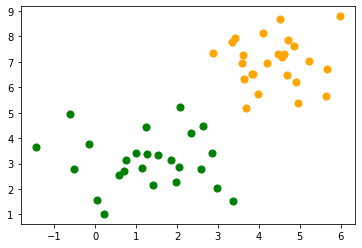

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 50
data, labels = make_blobs(n_samples=n_samples, 
                             centers=([1.1, 3], [4.5, 6.9]), 
                             random_state=0)


colours = ('green', 'orange')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

We will split our testset into a learnset and testset:

In [2]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

We will use not the `Perceptron` class of `sklearn.linear_model`:

In [3]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(train_data, train_labels)

Perceptron(random_state=42)

We can calculate predictions on the learnset and testset and can evaluate the score:

In [4]:
from sklearn.metrics import accuracy_score

predictions_train = p.predict(train_data)
predictions_test = p.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on train data: ", test_score)

score on train data:  1.0
score on train data:  0.9


In [5]:
p.score(train_data, train_labels)

1.0

### Classifying the Iris Data with Perceptron Classifier

We want to apply the `Perceptron` classifier on the iris dataset, which we had already used in our chapter on [k-nearest neighbor](./k_nearest_neighbor_classifier.php)

Loading the iris data set:

In [6]:
import numpy as np
from sklearn.datasets import load_iris


iris = load_iris()


We have one problem: The `Perceptron` classifiert can only be used on binary classification problems, but the Iris dataset consists fo three different classes, i.e. 'setosa', 'versicolor', 'virginica', corresponding to the labels 0, 1, and 2:

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We will merge the classes 'versicolor' and 'virginica' into one class. This means that only two classes are left. So we can differentiate with the classifier between  

- Iris setose
- not Iris setosa, or in other words either 'viriginica' od 'versicolor'

We accomplish this with the following command:

In [8]:
targets = (iris.target==0).astype(np.int8)
print(targets)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


We split the data into a learn and a testset:

In [9]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, 
                            targets,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

Now, we create a Perceptron instance and fit the training data:

In [10]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=10,
               tol=0.001)
p.fit(train_data, train_labels)

Perceptron(max_iter=10, random_state=42)

Now, we are ready for predictions and we will look at some randomly chosen random X values:


In [11]:
import random


sample = random.sample(range(len(train_data)), 10)
for i in sample:
    print(i, p.predict([train_data[i]]))

99 [1]
50 [0]
57 [0]
92 [0]
54 [0]
64 [0]
108 [0]
47 [0]
34 [0]
89 [0]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(train_data), train_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [13]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(test_data), test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

